# Manhattan Plot

In this notebook we intend to show how can be used the library `IDEAL-GENOM` to generate a Miami Plot. 

In [1]:
import sys
import os

import pandas as pd

import ipywidgets as widgets
from IPython.display import display

# add parent directory to path
library_path = os.path.abspath('..')
if library_path not in sys.path:
    sys.path.append(library_path)

from luxgiant_dstream.manhattan_type import manhattan_draw

At the end of the next cell, please fill the required values. The notebook could be modified according to the user interest and particular requirements, nevertheless in order to use as it is, the user should have the following specifications in mind. It is expected that all files are tab-separated-values, but the user can change this easily on the corresponding cell.

1. `input_path` is the path to the folder where the necessary files to draw the plot are.
2. `input_name` is the name of the file containing the **GWAS** summary statistics.
3. `highlights` is the name of the file containing the top hits to highlight.
4. `annotate` is the name of the file containing the rsID of the SNPs to annotate.

Usually one annotate a subset of the highlighted SNPs, but we give the freedom to annotate a different set of SNPs.

In [2]:
# Create interactive widgets for input
input_path = widgets.Text(
    value='/home/luis/data/gwasResult/',
    description='Path to project folder:',
    style={'description_width': 'initial'}
)

input_name = widgets.Text(
    value='annotated_normalized_combined_R2_0.3.dose_step2_sex_pheno-glm.PHENO1.glm.logistic.hybrid',
    description='Name of GWAS summary file:',
    style={'description_width': 'initial'}
)

highlight = widgets.Text(
    value='table_lead_SNPS_GWAS_glm_logistic_final_paper',
    description='Name of file with SNPs to highlight:',
    style={'description_width': 'initial'}
)

annotate = widgets.Text(
    value='table_lead_SNPS_GWAS_glm_logistic_final_paper',
    description='Name of file with SNPs to annotate:',
    style={'description_width': 'initial'}
)

# Display the widgets
display(input_path, input_name, highlight, annotate)

# Function to get the text parameter values
def get_params():
    return input_path.value, input_name.value, highlight.value, annotate.value

Text(value='/home/luis/data/gwasResult/', description='Path to project folder:', style=TextStyle(description_w…

Text(value='annotated_normalized_combined_R2_0.3.dose_step2_sex_pheno-glm.PHENO1.glm.logistic.hybrid', descrip…

Text(value='table_lead_SNPS_GWAS_glm_logistic_final_paper', description='Name of file with SNPs to highlight:'…

Text(value='table_lead_SNPS_GWAS_glm_logistic_final_paper', description='Name of file with SNPs to annotate:',…

In [3]:
# Use the parameter values
path_params = get_params()
print(f"Parameter 1: {path_params[0]}")
print(f"Parameter 2: {path_params[1]}")
print(f"Parameter 3: {path_params[2]}")
print(f"Parameter 4: {path_params[3]}")

Parameter 1: /home/luis/data/gwasResult/
Parameter 2: annotated_normalized_combined_R2_0.3.dose_step2_sex_pheno-glm.PHENO1.glm.logistic.hybrid
Parameter 3: table_lead_SNPS_GWAS_glm_logistic_final_paper
Parameter 4: table_lead_SNPS_GWAS_glm_logistic_final_paper


Please, provide the columns to load from the **GWAS** summary statistics. The essential columns are those that contains chromosome, base-pair position, rsID and p-value. It is important to remark that columns names most coincide in both files, at least for the four columns that will be used to generate the Manhattan plot.

In [ ]:
cols_touse = widgets.Textarea(
    value="#CHROM, POS, ID, P",
    description='Columns to use on the Mannhattan plot (comma-separated):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)
display(cols_touse)

def get_cols():
    return cols_touse.value

In [ ]:
cols = get_cols()

df_gwas = pd.read_csv(
    os.path.join(path_params[0], path_params[1]), sep='\t', usecols=[col.strip() for col in cols.split(',')]
)
df_gwas.head(5)

In [ ]:
rsID = widgets.Text(
    value='SNP',
    description='Column name with the rsID:',
    style={'description_width': 'initial'}
)

display(rsID)

def get_rsID():
    return rsID.value

In [5]:
gwas_rsID = get_rsID()

if path_params[2] is not None or path_params[2] != '':
    highlit_path = os.path.join(path_params[0], path_params[2])
    if os.path.exists(highlit_path):
        df_high = pd.read_csv(
            highlit_path, sep='\t'
        )
        to_highlight = df_high[gwas_rsID].to_list()
        print(to_highlight[:10])
        del df_high
    else:
        print('Path to file with SNPs to highlight does not exist')
        to_highlight = []
else:
    print('No file with SNPs to highlight')
    to_highlight = []

['rs3747973', 'rs74990530', 'rs34311866', 'rs356182', 'rs7681440', 'rs1846190', 'rs2517680', 'rs4909940', 'rs528813377', 'rs56328224']


In [6]:
if path_params[3] is not None and path_params[3] != '':
    anno_path = os.path.join(path_params[0], path_params[3])
    if os.path.exists(anno_path):
        df_anno = pd.read_csv(
            anno_path, sep='\t'
        )
        to_annotate = df_anno[gwas_rsID].to_list()
        print(to_annotate[:10])
        del df_anno
    else:
        print('Path to file with SNPs to annotate does not exist')
        to_annotate = []
else:
    print('No file with SNPs to annotate')
    to_annotate = []

['rs3747973', 'rs74990530', 'rs34311866', 'rs356182', 'rs7681440', 'rs1846190', 'rs2517680', 'rs4909940', 'rs528813377', 'rs56328224']


In [ ]:
SNP_col = widgets.Text(
    value='ID',
    description='Column with rsID:',
    style={'description_width': 'initial'}
)

CHR_col = widgets.Text(
    value='#CHROM',
    description='Column with chromosome:',
    style={'description_width': 'initial'}
)

POS_col = widgets.Text(
    value='POS',
    description='Column with base-pair position:',
    style={'description_width': 'initial'}
)

P_col = widgets.Text(
    value='P',
    description='Column with p-values:',
    style={'description_width': 'initial'}
)
display(SNP_col, CHR_col, POS_col, P_col)

def get_col_names():
    return SNP_col.value, CHR_col.value, POS_col.value, P_col.value

In [ ]:
snp_col, chr_col, pos_col, p_col = get_col_names()

2024/10/28 15:55:06 Start to annotate variants with nearest gene name(s)...
2024/10/28 15:55:06  -Assigning Gene name using NCBI refseq latest GRCh38 for protein coding genes
2024/10/28 15:55:06  -Using user-provided gtf:/home/luis/CGE/luxgiant-dstream/GCF_000001405.40_GRCh38.p14_genomic.gtf
2024/10/28 15:55:06 Finished annotating variants with nearest gene name(s) successfully!


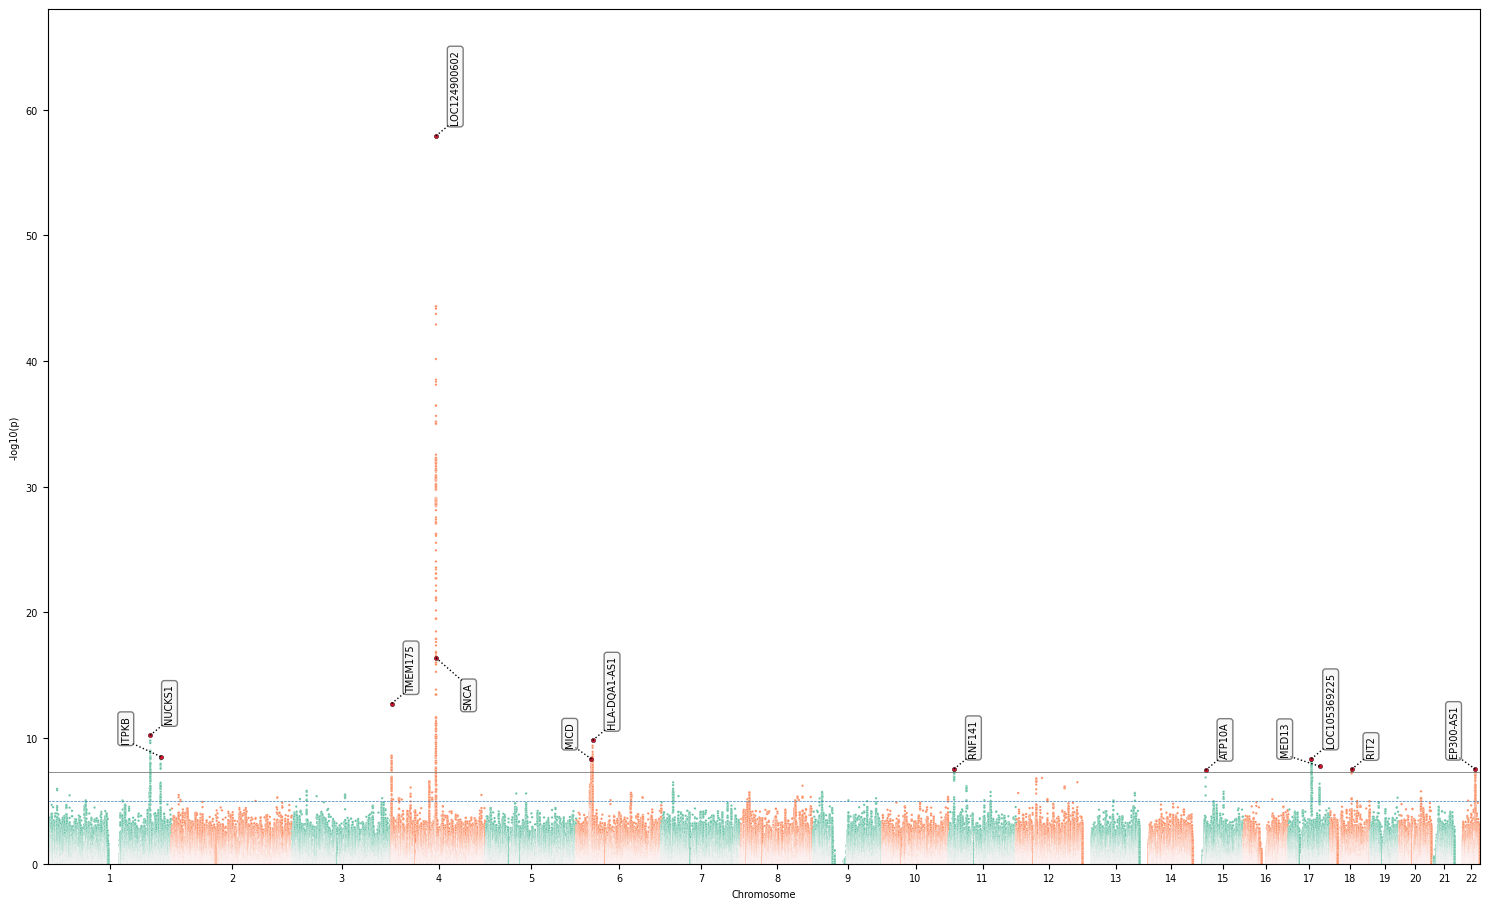

True

In [7]:
manhattan_draw(
    data_df     =df_gwas,
    chr_col     =chr_col,
    pos_col     =pos_col,
    p_col       =p_col,
    snp_col     =snp_col,
    plot_dir    =path_params[0],
    to_highlight=to_highlight,
    to_annotate =to_annotate,
    save_name='manhattan_plot_indian_gwas.jpeg'
)